<h1>FINAL PROJECT MACHINE LEARNING (F)</h1>

---
BENCHMARK FPS: MENGUKUR PERFORMA CPU DAN GPU DALAM GAMING

Dari dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/fps-benchmark/code

Dengan link Github: https://github.com/Obay13579/FINAL_PROJECT_ML

---
Muhammad Ivan Ardianadi Afiat / 5025221178 (XGBoost)

Irfan Ridhana					/ 5025221214 (Decision Tree)

Nuril Qolbi Zam Zami			/ 5025221296  (SVM)


# Import Library

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Import Dataset

In [60]:
url = "https://raw.githubusercontent.com/Obay13579/FINAL_PROJECT_ML/main/fps_benchmark.csv"
df = pd.read_csv(url)
df.head()

CpuName  CpuNumberOfCores  CpuNumberOfThreads  CpuBaseClock  \
0  b'Intel Core i9-9900K'               8.0                16.0         100.0   
1  b'Intel Core i7-9700K'               8.0                 8.0         100.0   
2  b'Intel Core i7-8700K'               6.0                12.0         100.0   
3  b'Intel Core i7-7700K'               4.0                 8.0         100.0   
4  b'Intel Core i5-9400F'               6.0                 6.0         100.0   

   CpuCacheL1  CpuCacheL2  CpuCacheL3  CpuDieSize  CpuFrequency  \
0       512.0      2048.0        16.0         NaN        3600.0   
1       512.0      2048.0        12.0         NaN        3600.0   
2       384.0      1536.0        12.0         NaN        3700.0   
3       256.0      1024.0         8.0         NaN        4200.0   
4       384.0      1536.0         9.0         NaN        2900.0   

   CpuMultiplier  ... GpuShaderModel  GpuNumberOfShadingUnits  \
0           36.0  ...         b'6.5'                   4352.0   
1           36.0  ...         b'6.5'                   4352.0   
2           37.0  ...         b'6.5'                   4352.0   
3           42.0  ...         b'6.5'                   4352.0   
4           29.0  ...         b'6.5'                   4352.0   

   GpuNumberOfTMUs  GpuTextureRate  GpuNumberOfTransistors   GpuVulkan  \
0            272.0        420200.0                 18600.0  b'1.2.131'   
1            272.0        420200.0                 18600.0  b'1.2.131'   
2            272.0        420200.0                 18600.0  b'1.2.131'   
3            272.0        420200.0                 18600.0  b'1.2.131'   
4            272.0        420200.0                 18600.0  b'1.2.131'   

           GameName  GameResolution  GameSetting    FPS  
0  b'callOfDutyWW2'          1080.0       b'med'  225.3  
1  b'callOfDutyWW2'          1080.0       b'med'  223.3  
2  b'callOfDutyWW2'          1080.0       b'med'  207.3  
3  b'callOfDutyWW2'          1080.0       b'med'  201.3  
4  b'callOfDutyWW2'          1080.0       b'med'  199.2  

[5 rows x 44 columns]

# Data Visualization

In [61]:
!pip -q install ydata_profiling

In [62]:
from ydata_profiling import ProfileReport

In [63]:
profile = ProfileReport(df,title="BENCHMARK FPS: MENGUKUR PERFORMA CPU DAN GPU DALAM GAMING", minimal=True)
profile.to_file("report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
profile

# Data Cleaning

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24624 entries, 0 to 24623
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CpuName                    24624 non-null  object 
 1   CpuNumberOfCores           24624 non-null  float64
 2   CpuNumberOfThreads         24624 non-null  float64
 3   CpuBaseClock               24624 non-null  float64
 4   CpuCacheL1                 24624 non-null  float64
 5   CpuCacheL2                 24624 non-null  float64
 6   CpuCacheL3                 24624 non-null  float64
 7   CpuDieSize                 11664 non-null  float64
 8   CpuFrequency               24624 non-null  float64
 9   CpuMultiplier              24624 non-null  float64
 10  CpuMultiplierUnlocked      24624 non-null  object 
 11  CpuProcessSize             24624 non-null  float64
 12  CpuTDP                     24624 non-null  float64
 13  CpuNumberOfTransistors     11664 non-null  flo

Drop kolom yang memiliki baris kosong, karena apabila baris yang di drop, akan banyak unique data yang terhapus dan perbandingan untuk analisis akan semakin sedikit

In [66]:
df = df.drop(['CpuDieSize', 'CpuNumberOfTransistors', 'GpuNumberOfComputeUnits', 'GpuNumberOfExecutionUnits'], axis=1)

In [67]:
df.nunique()

CpuName                      19
CpuNumberOfCores              5
CpuNumberOfThreads            6
CpuBaseClock                  1
CpuCacheL1                    7
CpuCacheL2                    7
CpuCacheL3                    8
CpuFrequency                  8
CpuMultiplier                 8
CpuMultiplierUnlocked         2
CpuProcessSize                3
CpuTDP                        5
CpuTurboClock                13
GpuName                      27
GpuArchitecture               6
GpuBandwidth                 17
GpuBaseClock                 21
GpuBoostClock                22
GpuBus.interface              2
GpuDieSize                   13
GpuDirectX                    2
GpuFP32Performance           25
GpuMemoryBus                  8
GpuMemorySize                 8
GpuMemoryType                 4
GpuOpenCL                     2
GpuOpenGL                     1
GpuPixelRate                 25
GpuProcessSize                5
GpuNumberOfROPs               8
GpuShaderModel                2
GpuNumbe

Drop Fitur yang memiliki 1 data unik

In [68]:
df = df.drop(['CpuBaseClock', 'GpuOpenGL', 'GameResolution'], axis=1)

Untuk menghilangkan string b'...' dalam kolom bertipe data object/string, agar memudahkan untuk visualisasi


In [69]:
# Define the function to remove the pattern b'...'
def remove_pattern(text):
    pattern = re.compile(r"b'(.*?)'")
    match = pattern.match(text)
    if match:
        return match.group(1)
    return text

# List of columns to clean
columns_to_clean = [
    'CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture',
    'GpuBus.interface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL',
    'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting'
]

# Apply the function to each specified column
for column in columns_to_clean:
    df[column] = df[column].apply(remove_pattern)

Menghilangkan kata yang kurang dibutuhkan agar memudahkan visualisasi

In [70]:
patterns_to_remove = [
    r'AMD\s*',
    r'Intel Core\s*',
]

compiled_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in patterns_to_remove]

def preprocess_cpu_name(name):
    for pattern in compiled_patterns:
        name = pattern.sub('', name)
    return name.strip()

df['CpuName'] = df['CpuName'].apply(preprocess_cpu_name)

In [71]:
patterns_to_remove = [
    r'NVIDIA GeForce\s*',
    r'AMD Radeon\s*',
    r'\d+Gbps',
    r'\d+\s*GB',
    r'GDDR\d*[Xx]?',
]

compiled_patterns = [re.compile(pattern, re.IGNORECASE) for pattern in patterns_to_remove]

def preprocess_gpu_name(name):
    for pattern in compiled_patterns:
        name = pattern.sub('', name)
    return name.strip()

df['GpuName'] = df['GpuName'].apply(preprocess_gpu_name)

In [72]:
profile_clean = ProfileReport(df,title="BENCHMARK FPS: MENGUKUR PERFORMA CPU DAN GPU DALAM GAMING", minimal=True)
profile_clean.to_file("report_clean.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
profile_clean

# Pre-Processing

## Feature Selection

In [74]:
df = df.drop(['CpuName', 'CpuMultiplierUnlocked', 'GpuName',  'GpuArchitecture', 'GpuBus.interface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting'], axis=1)

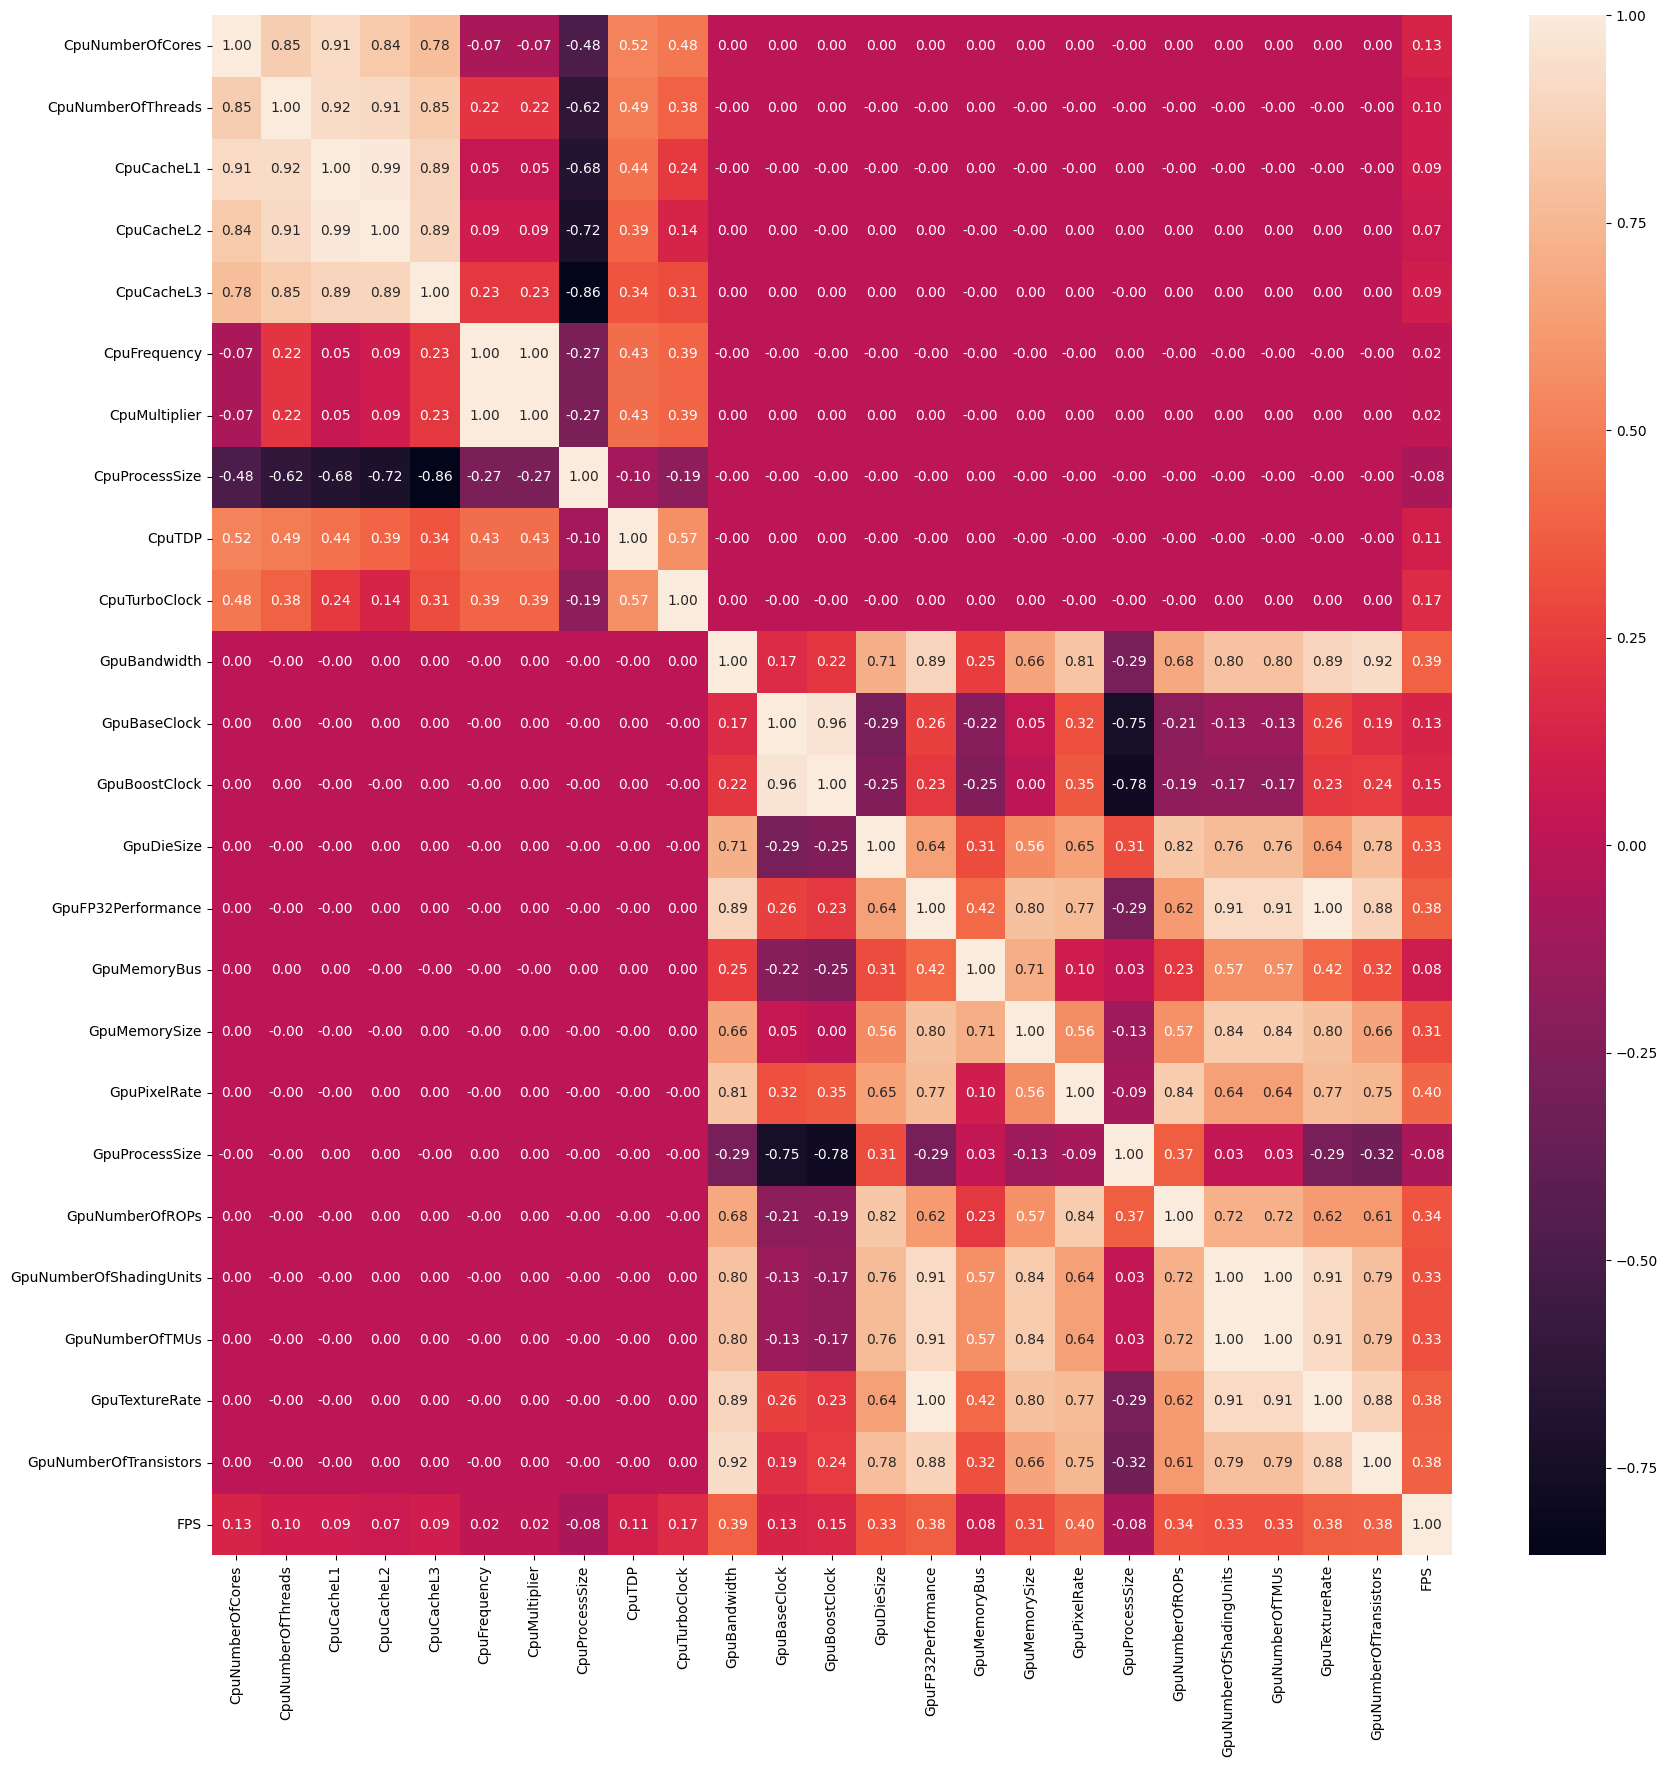

In [75]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')

plt.show()

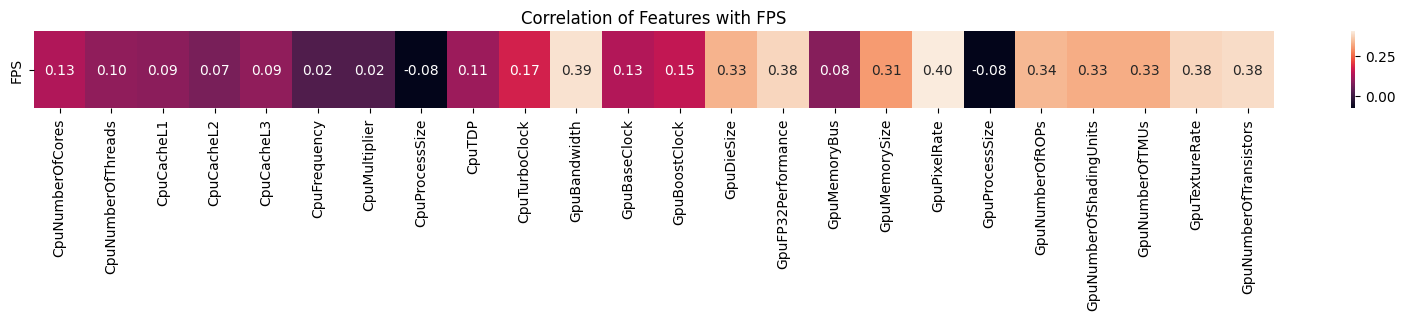

In [76]:
correlations = df.corr()['FPS'].drop('FPS')

correlation_df = correlations.to_frame().transpose()

plt.figure(figsize=(20, 1))
sns.heatmap(correlation_df, annot=True, fmt='.2f')

plt.title('Correlation of Features with FPS')
plt.show()

In [77]:
cor = df.corr()
cor_target = abs(cor["FPS"])
relevant_features = cor_target[cor_target > 0]
relevant_features = relevant_features.sort_values(ascending=False)

print(relevant_features)

FPS                        1.000000
GpuPixelRate               0.403462
GpuBandwidth               0.390828
GpuNumberOfTransistors     0.383007
GpuTextureRate             0.375973
GpuFP32Performance         0.375971
GpuNumberOfROPs            0.338063
GpuDieSize                 0.333021
GpuNumberOfTMUs            0.325489
GpuNumberOfShadingUnits    0.325489
GpuMemorySize              0.305281
CpuTurboClock              0.171679
GpuBoostClock              0.152464
GpuBaseClock               0.133981
CpuNumberOfCores           0.130590
CpuTDP                     0.108188
CpuNumberOfThreads         0.095203
CpuCacheL3                 0.094877
CpuCacheL1                 0.089255
GpuMemoryBus               0.084036
GpuProcessSize             0.078965
CpuProcessSize             0.078404
CpuCacheL2                 0.069526
CpuMultiplier              0.021338
CpuFrequency               0.021338
Name: FPS, dtype: float64


## Feature Scaling

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, LabelEncoder, OrdinalEncoder

In [79]:
df['GameName'] = pd.read_csv(url)['GameName']
df['GameSetting'] = pd.read_csv(url)['GameSetting']

def remove_pattern(text):
    pattern = re.compile(r"b'(.*?)'")
    match = pattern.match(text)
    if match:
        return match.group(1)
    return text

columns_to_clean = [
    'GameName',
    'GameSetting'
]

for column in columns_to_clean:
    df[column] = df[column].apply(remove_pattern)

In [80]:
df = pd.get_dummies(df, columns=['GameName'], drop_first=True)
df = pd.get_dummies(df, columns=['GameSetting'], drop_first=False)

In [81]:
df_r = df.copy()

features = ['GpuPixelRate', 'GpuBandwidth', 'GpuNumberOfTransistors', 'GpuTextureRate', 'GpuFP32Performance',
            'GpuNumberOfROPs', 'GpuDieSize', 'GpuNumberOfTMUs', 'GpuNumberOfShadingUnits', 'GpuMemorySize',
            'GpuBoostClock', 'GpuBaseClock', 'GpuMemoryBus', 'GpuProcessSize'] + ['CpuTurboClock', 'CpuNumberOfCores',
            'CpuTDP', 'CpuNumberOfThreads', 'CpuCacheL3', 'CpuCacheL1','CpuCacheL2', 'CpuMultiplier', 'CpuFrequency',
            'CpuProcessSize'] + [col for col in df_r.columns if col.startswith('GameName_')] + [col for col in df_r.columns if col.startswith('GameSetting_')]

target = ['FPS']

X_r = df_r[features]

Y_r = df_r[target].values.ravel()

In [82]:
scaler = MinMaxScaler()
X_scaled_r = scaler.fit_transform(X_r)

In [83]:
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X_scaled_r, Y_r, test_size=0.2)

# Regression Modeling

In [84]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [85]:
models_name_r = []
mae = []
rmse = []
r2 = []

### XGBoost

In [86]:
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=0
)

start_time = time.time()
xgb_regressor.fit(X_train_r, Y_train_r)
training_time = time.time() - start_time

pred_xgb_r = xgb_regressor.predict(X_test_r)

mae.append(mean_absolute_error(Y_test_r, pred_xgb_r))
rmse.append(mean_squared_error(Y_test_r, pred_xgb_r, squared=False))
r2.append(r2_score(Y_test_r, pred_xgb_r))
models_name_r.append("XGBoost")

print(f"{models_name_r[0]}:")
print(f'Regression - Mean Absolute Error (MAE): {mae[0]}')
print(f'Regression - Root Mean Squared Error (RMSE): {rmse[0]}')
print(f'Regression - R-squared: {r2[0]}')
print(f'Training Time: {training_time} seconds')

XGBoost:
Regression - Mean Absolute Error (MAE): 3.341682063456114
Regression - Root Mean Squared Error (RMSE): 4.368777796276287
Regression - R-squared: 0.9939113643232672
Training Time: 0.3782196044921875 seconds


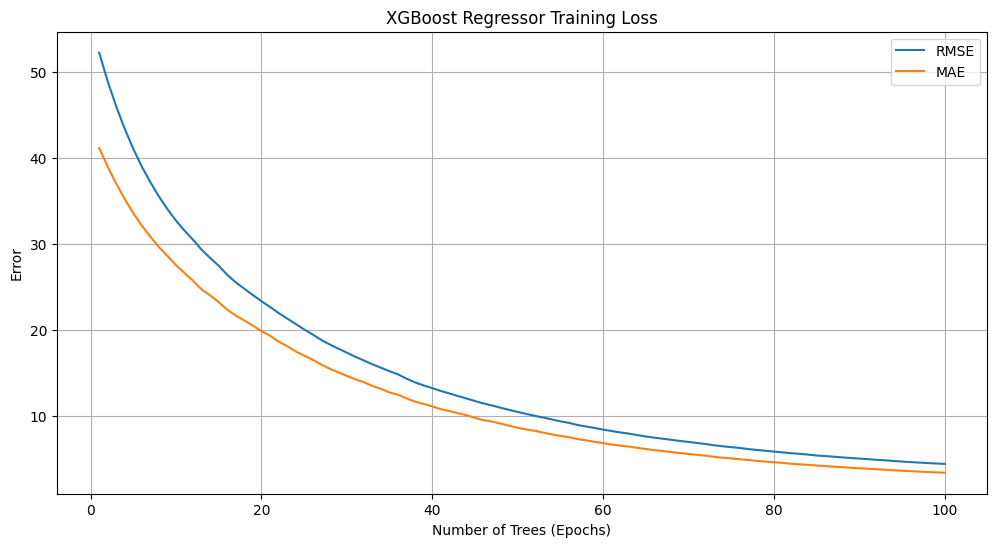

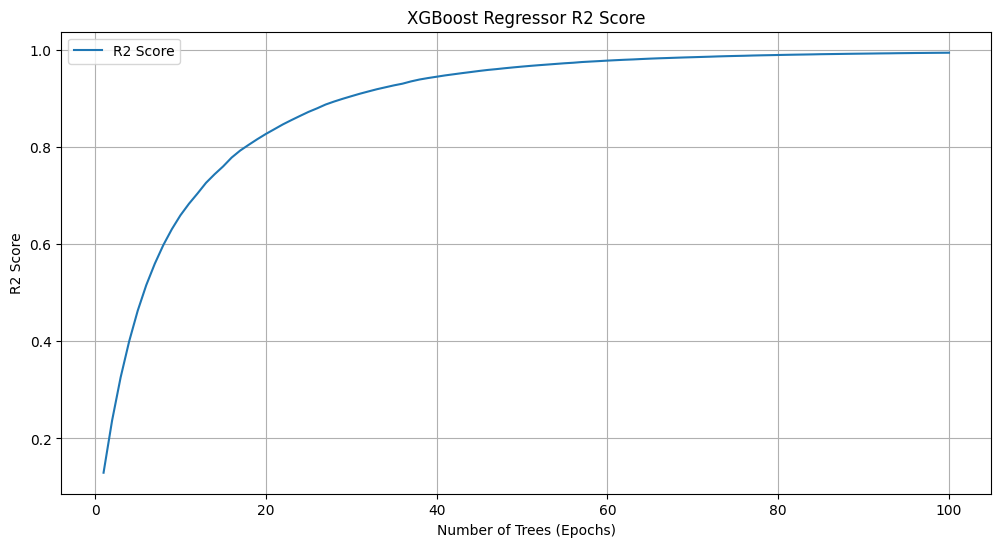

In [87]:
def train_xgb_incrementally(X_train, y_train, X_test, y_test, n_estimators, learning_rate, max_depth, random_state):
    rmse_history = []
    mae_history = []
    r2_history = []

    for n in range(1, n_estimators + 1):
        model = XGBRegressor(
            objective='reg:squarederror',
            n_estimators=n,
            learning_rate=learning_rate,
            max_depth=max_depth,
            random_state=random_state
        )
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse_history.append(mean_squared_error(y_test, y_pred, squared=False))  # RMSE
        mae_history.append(mean_absolute_error(y_test, y_pred))
        r2_history.append(r2_score(y_test, y_pred))

    return rmse_history, mae_history, r2_history

n_estimators = 100
learning_rate = 0.1
max_depth = 6
random_state = 0

rmse_history, mae_history, r2_history = train_xgb_incrementally(
    X_train_r, Y_train_r, X_test_r, Y_test_r,
    n_estimators, learning_rate, max_depth, random_state
)

plt.figure(figsize=(12, 6))
epochs = range(1, n_estimators + 1)
plt.plot(epochs, rmse_history, label='RMSE')
plt.plot(epochs, mae_history, label='MAE')
plt.xlabel('Number of Trees (Epochs)')
plt.ylabel('Error')
plt.title('XGBoost Regressor Training Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, r2_history, label='R2 Score')
plt.xlabel('Number of Trees (Epochs)')
plt.ylabel('R2 Score')
plt.title('XGBoost Regressor R2 Score')
plt.legend()
plt.grid(True)
plt.show()

### SVM

In [88]:
start_time = time.time()
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_r, Y_train_r)
training_time = time.time() - start_time
pred_svr_rbf = svr_rbf.predict(X_test_r)

mae.append(mean_absolute_error(Y_test_r, pred_svr_rbf))
rmse.append(mean_squared_error(Y_test_r, pred_svr_rbf, squared=False))
r2.append(r2_score(Y_test_r, pred_svr_rbf))
models_name_r.append('SVR Kernel RBF')

print(f"{models_name_r[1]}:")
print(f"  Mean Absolute Error (MAE): {mae[1]}")
print(f"  Root Mean Squared Error (MSE): {rmse[1]}")
print(f"  R-squared (R2): {r2[1]}")
print(f'  Training Time: {training_time} seconds\n')

start_time = time.time()
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_r, Y_train_r)
training_time = time.time() - start_time
pred_svr_linear = svr_linear.predict(X_test_r)

mae.append(mean_absolute_error(Y_test_r, pred_svr_linear))
rmse.append(mean_squared_error(Y_test_r, pred_svr_linear, squared=False))
r2.append(r2_score(Y_test_r, pred_svr_linear))
models_name_r.append('SVR Kernel Linear')

print(f"{models_name_r[2]}:")
print(f"  Mean Absolute Error (MAE): {mae[2]}")
print(f"  Root Mean Squared Error (MSE): {rmse[2]}")
print(f"  R-squared (R2): {r2[2]}")
print(f'  Training Time: {training_time} seconds\n')

start_time = time.time()
svr_poly = SVR(kernel='poly')
svr_poly.fit(X_train_r, Y_train_r)
training_time = time.time() - start_time
pred_svr_poly = svr_poly.predict(X_test_r)

mae.append(mean_absolute_error(Y_test_r, pred_svr_poly))
rmse.append(mean_squared_error(Y_test_r, pred_svr_poly, squared=False))
r2.append(r2_score(Y_test_r, pred_svr_poly))
models_name_r.append('SVR Kernel Poly')

print(f"{models_name_r[3]}:")
print(f"  Mean Absolute Error (MAE): {mae[3]}")
print(f"  Root Mean Squared Error (MSE): {rmse[3]}")
print(f"  R-squared (R2): {r2[3]}")
print(f'  Training Time: {training_time} seconds\n')

SVR Kernel RBF:
  Mean Absolute Error (MAE): 6.9916963834058645
  Root Mean Squared Error (MSE): 14.034621731251065
  R-squared (R2): 0.9371650174047736
  Training Time: 31.294779062271118 seconds

SVR Kernel Linear:
  Mean Absolute Error (MAE): 9.01376152229392
  Root Mean Squared Error (MSE): 13.204278346928891
  R-squared (R2): 0.9443802007577781
  Training Time: 24.012230157852173 seconds

SVR Kernel Poly:
  Mean Absolute Error (MAE): 4.812232089175987
  Root Mean Squared Error (MSE): 7.8440249986447315
  R-squared (R2): 0.980371911218599
  Training Time: 27.895176649093628 seconds



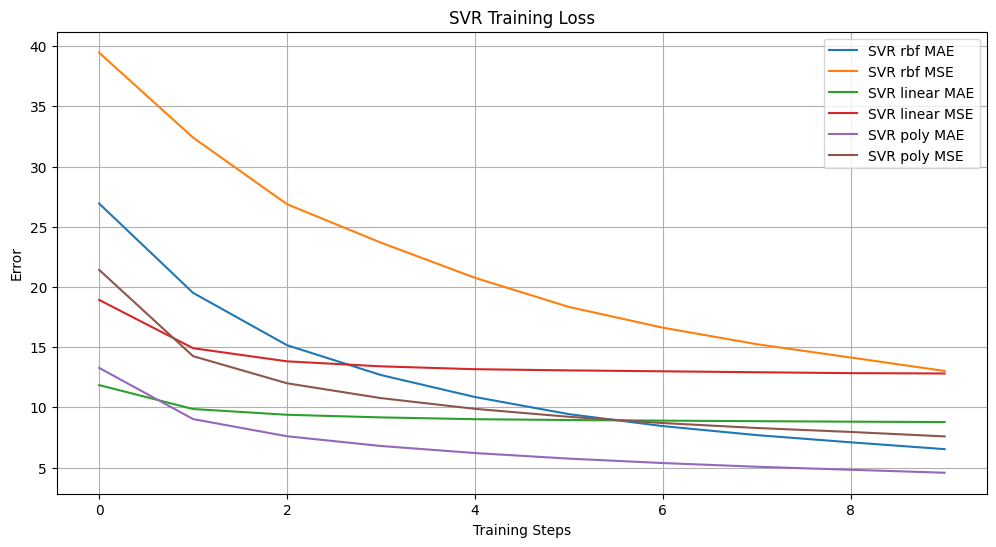

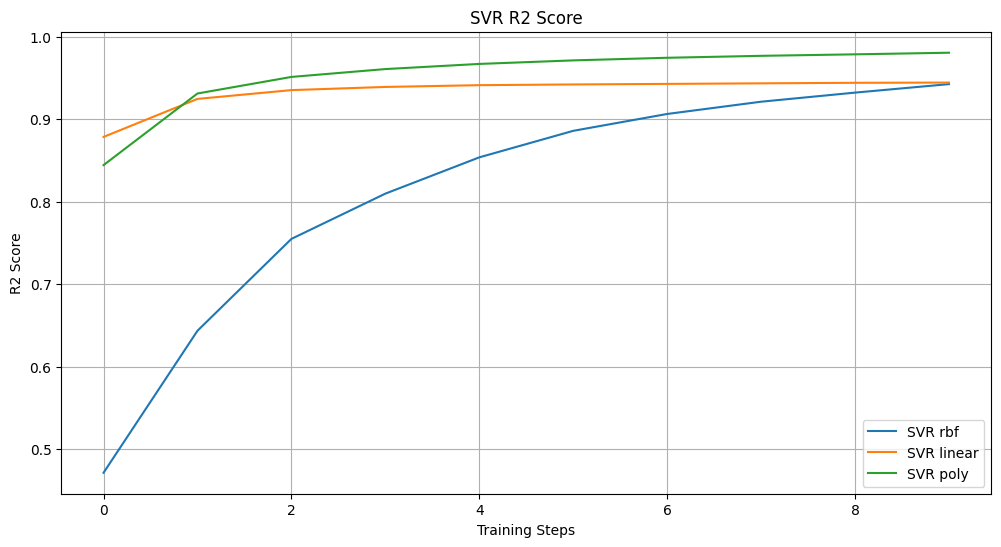

In [89]:
def train_svr_incrementally(X, y, kernel, n_steps=10):
    mae_history = []
    rmse_history = []
    r2_history = []
    step_size = len(X) // n_steps

    for i in range(1, n_steps + 1):
        X_subset = X[:i*step_size]
        y_subset = y[:i*step_size]

        model = SVR(kernel=kernel)
        model.fit(X_subset, y_subset)

        y_pred = model.predict(X)
        mae_history.append(mean_absolute_error(y, y_pred))
        rmse_history.append(mean_squared_error(y, y_pred, squared=False))
        r2_history.append(r2_score(y, y_pred))

    return mae_history, rmse_history, r2_history

kernels = ['rbf', 'linear', 'poly']
mae_histories = {}
rmse_histories = {}
r2_histories = {}

for kernel in kernels:
    mae_histories[kernel], rmse_histories[kernel], r2_histories[kernel] = train_svr_incrementally(X_train_r, Y_train_r, kernel)

plt.figure(figsize=(12, 6))
for kernel in kernels:
    plt.plot(mae_histories[kernel], label=f'SVR {kernel} MAE')
    plt.plot(rmse_histories[kernel], label=f'SVR {kernel} MSE')
plt.xlabel('Training Steps')
plt.ylabel('Error')
plt.title('SVR Training Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for kernel in kernels:
    plt.plot(r2_histories[kernel], label=f'SVR {kernel}')
plt.xlabel('Training Steps')
plt.ylabel('R2 Score')
plt.title('SVR R2 Score')
plt.legend()
plt.grid(True)
plt.show()

### Decision Tree

In [90]:
start_time = time.time()
dtree_regressor = DecisionTreeRegressor(random_state=0)
dtree_regressor.fit(X_train_r, Y_train_r)
training_time = time.time() - start_time

pred_dtree_r = dtree_regressor.predict(X_test_r)

mae.append(mean_absolute_error(Y_test_r, pred_dtree_r))
rmse.append(mean_squared_error(Y_test_r, pred_dtree_r, squared=False))
r2.append(r2_score(Y_test_r, pred_dtree_r))
models_name_r.append('Decision Tree')
print(f"{models_name_r[4]}:")
print(f'Mean Absolute Error: {mae[4]}')
print(f'Root Mean Squared Error: {rmse[4]}')
print(f'Regression - R-squared: {r2[4]}')
print(f'Training Time: {training_time} seconds')

Decision Tree:
Mean Absolute Error: 2.879269035532995
Root Mean Squared Error: 4.3503343707186275
Regression - R-squared: 0.9939626639171935
Training Time: 0.2792823314666748 seconds


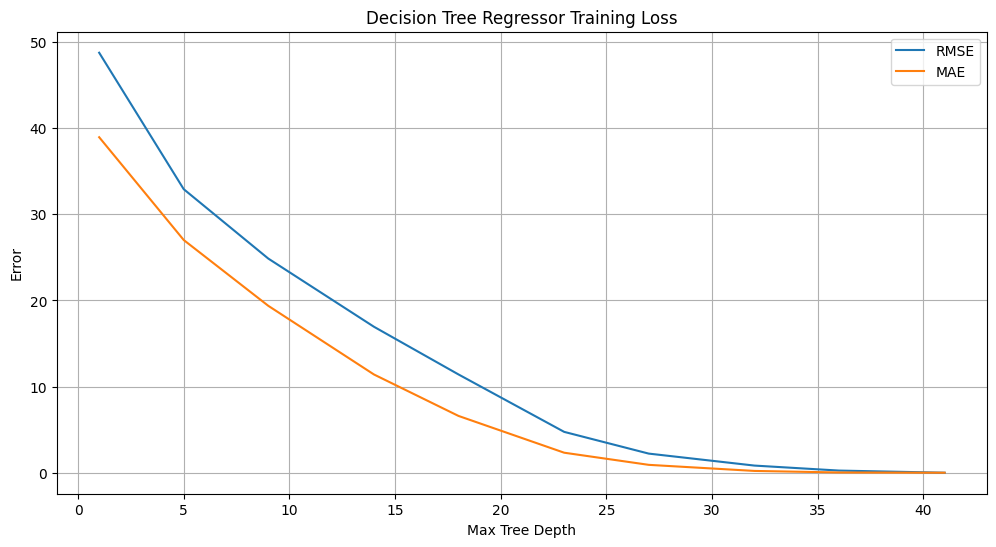

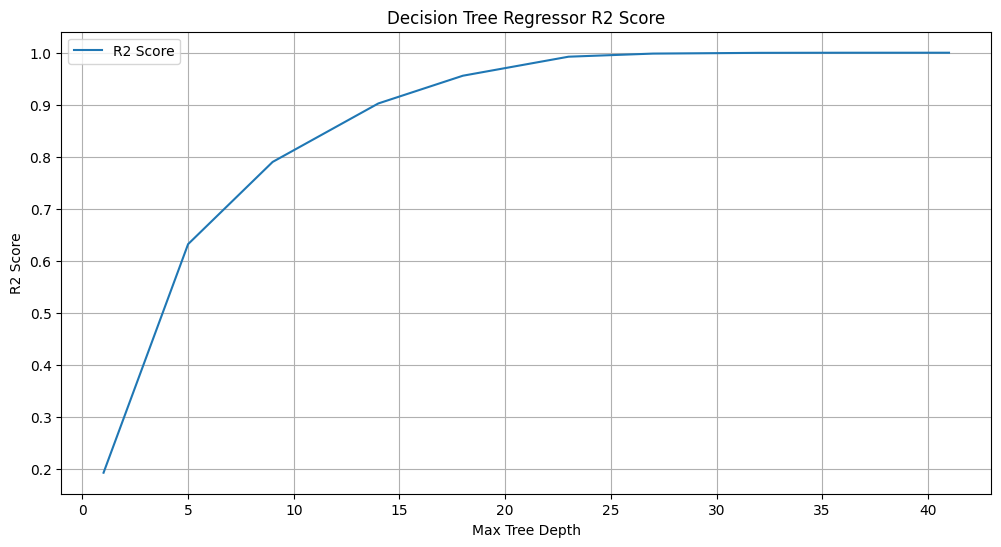

In [91]:
def train_dtree_incrementally(X, y, max_depth, n_steps=10):
    rmse_history = []
    mae_history = []
    r2_history = []
    depth_range = np.linspace(1, max_depth, n_steps, dtype=int)

    for depth in depth_range:
        model = DecisionTreeRegressor(max_depth=depth, random_state=0)
        model.fit(X, y)

        y_pred = model.predict(X)
        rmse_history.append(mean_squared_error(y, y_pred, squared=False))
        mae_history.append(mean_absolute_error(y, y_pred))
        r2_history.append(r2_score(y, y_pred))

    return depth_range, rmse_history, mae_history, r2_history

max_depth = dtree_regressor.get_depth()

depth_range, rmse_history, mae_history, r2_history = train_dtree_incrementally(X_train_r, Y_train_r, max_depth)

plt.figure(figsize=(12, 6))
plt.plot(depth_range, rmse_history, label='RMSE')
plt.plot(depth_range, mae_history, label='MAE')
plt.xlabel('Max Tree Depth')
plt.ylabel('Error')
plt.title('Decision Tree Regressor Training Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(depth_range, r2_history, label='R2 Score')
plt.xlabel('Max Tree Depth')
plt.ylabel('R2 Score')
plt.title('Decision Tree Regressor R2 Score')
plt.legend()
plt.grid(True)
plt.show()

### Predicting New Data

In [92]:
new_prediction_r_med = []
new_prediction_r_max = []
models_name_r_pred_med = []
models_name_r_pred_max = []

#### Medium Settings

In [93]:
new_sample_med = {
    'GpuPixelRate': 109400.0,
    'GpuBandwidth': 350000.0,
    'GpuNumberOfTransistors': 11800,
    'GpuTextureRate': 354400.0,
    'GpuFP32Performance': 10070000.0,
    'GpuNumberOfROPs': 64,
    'GpuDieSize': 0.000471,
    'GpuNumberOfTMUs': 224,
    'GpuNumberOfShadingUnits': 2944,
    'GpuMemorySize': 8000,
    'GpuBoostClock': 1905,
    'GpuBaseClock': 1700,
    'GpuMemoryBus': 384,
    'GpuProcessSize': 14,

    'CpuTurboClock': 3800,
    'CpuNumberOfCores': 8,
    'CpuTDP': 105,
    'CpuNumberOfThreads': 16,
    'CpuCacheL3': 16,
    'CpuCacheL1': 576,
    'CpuCacheL2': 3072,
    'CpuMultiplier': 37,
    'CpuFrequency': 3600,
    'CpuProcessSize': 14,

    'GameName_frostpunk': 1,
    'GameSetting_med': 1
}

new_data_med = pd.DataFrame({feature: [0] for feature in features})

for key, value in new_sample_med.items():
    new_data_med[key] = value

new_data_med = new_data_med[features]

new_data_scaled_med = scaler.transform(new_data_med)

In [94]:
new_prediction_r_med.append(xgb_regressor.predict(new_data_scaled_med))
models_name_r_pred_med.append('XGBoost')

new_prediction = new_prediction_r_med[0][0]
print(f'Predicted FPS for new data: {new_prediction}')

Predicted FPS for new data: 146.44610595703125


In [95]:
new_prediction_r_med.append(svr_rbf.predict(new_data_scaled_med))
models_name_r_pred_med.append('SVR RBF')
new_prediction_r_med.append(svr_linear.predict(new_data_scaled_med))
models_name_r_pred_med.append('SVR Linear')
new_prediction_r_med.append(svr_poly.predict(new_data_scaled_med))
models_name_r_pred_med.append('SVR Poly')

new_prediction = new_prediction_r_med[1][0]
print(f'Predicted FPS for new data (RBF kernel): {new_prediction}')
new_prediction = new_prediction_r_med[2][0]
print(f'Predicted FPS for new data (Linear kernel): {new_prediction}')
new_prediction = new_prediction_r_med[3][0]
print(f'Predicted FPS for new data (Polynomial kernel): {new_prediction}')

Predicted FPS for new data (RBF kernel): 149.93987093272756
Predicted FPS for new data (Linear kernel): 158.66241363301566
Predicted FPS for new data (Polynomial kernel): 168.89140541396563


In [96]:
new_prediction_r_med.append(dtree_regressor.predict(new_data_scaled_med))
models_name_r_pred_med.append('Decision Tree')

new_prediction = new_prediction_r_med[4][0]
print(f'Predicted FPS class for new data: {new_prediction}')

Predicted FPS class for new data: 147.0


In [97]:
def find_closest_match(df, new_sample):
    diff = df[features].sub(pd.Series(new_sample), axis='columns').abs()

    closest_match_index = diff.sum(axis=1).idxmin()

    return df.loc[closest_match_index]

closest_match = find_closest_match(df, new_sample_med)

fps_value_med = closest_match['FPS']

print(f"Closest match FPS: {fps_value_med}")

print("\nClosest match details:")
for feature in features:
    print(f"{feature}: {closest_match[feature]}")

similar_configs = df[
    (df['GpuPixelRate'].between(new_sample_med['GpuPixelRate']*0.9, new_sample_med['GpuPixelRate']*1.1)) &
    (df['GpuBandwidth'].between(new_sample_med['GpuBandwidth']*0.9, new_sample_med['GpuBandwidth']*1.1)) &
    (df['CpuTurboClock'].between(new_sample_med['CpuTurboClock']*0.9, new_sample_med['CpuTurboClock']*1.1)) &
    (df['GameName_frostpunk'] == new_sample_med['GameName_frostpunk']) &
    (df['GameSetting_med'] == new_sample_med['GameSetting_med'])
]

avg_fps = similar_configs['FPS'].mean()
print(f"\nAverage FPS for similar configurations: {avg_fps:.2f}")

Closest match FPS: 159.2

Closest match details:
GpuPixelRate: 109400.0
GpuBandwidth: 448000.0
GpuNumberOfTransistors: 13600.0
GpuTextureRate: 314600.0
GpuFP32Performance: 10070000.0
GpuNumberOfROPs: 64.0
GpuDieSize: 0.000545
GpuNumberOfTMUs: 184.0
GpuNumberOfShadingUnits: 2944.0
GpuMemorySize: 8000.0
GpuBoostClock: 1710.0
GpuBaseClock: 1515.0
GpuMemoryBus: 256.0
GpuProcessSize: 12.0
CpuTurboClock: 4000.0
CpuNumberOfCores: 6.0
CpuTDP: 95.0
CpuNumberOfThreads: 12.0
CpuCacheL3: 16.0
CpuCacheL1: 576.0
CpuCacheL2: 3072.0
CpuMultiplier: 36.0
CpuFrequency: 3600.0
CpuProcessSize: 14.0
GameName_airMechStrike: False
GameName_apexLegends: False
GameName_battlefield4: False
GameName_battletech: False
GameName_callOfDutyWW2: False
GameName_counterStrikeGlobalOffensive: False
GameName_destiny2: False
GameName_dota2: False
GameName_farCry5: False
GameName_fortnite: False
GameName_frostpunk: True
GameName_grandTheftAuto5: False
GameName_leagueOfLegends: False
GameName_overwatch: False
GameName_pathOf

#### Maximum Settings

In [98]:
new_sample_max = {
    'GpuPixelRate': 109400.0,
    'GpuBandwidth': 350000.0,
    'GpuNumberOfTransistors': 11800,
    'GpuTextureRate': 354400.0,
    'GpuFP32Performance': 10070000.0,
    'GpuNumberOfROPs': 64,
    'GpuDieSize': 0.000471,
    'GpuNumberOfTMUs': 224,
    'GpuNumberOfShadingUnits': 2944,
    'GpuMemorySize': 8000,
    'GpuBoostClock': 1905,
    'GpuBaseClock': 1700,
    'GpuMemoryBus': 384,
    'GpuProcessSize': 14,

    'CpuTurboClock': 3800,
    'CpuNumberOfCores': 8,
    'CpuTDP': 105,
    'CpuNumberOfThreads': 16,
    'CpuCacheL3': 16,
    'CpuCacheL1': 576,
    'CpuCacheL2': 3072,
    'CpuMultiplier': 37,
    'CpuFrequency': 3600,
    'CpuProcessSize': 14,

    'GameName_frostpunk': 1,
    'GameSetting_max': 1
}

new_data_max = pd.DataFrame({feature: [0] for feature in features})

for key, value in new_sample_max.items():
    new_data_max[key] = value

new_data_max = new_data_max[features]

new_data_scaled_max = scaler.transform(new_data_max)

In [99]:
new_prediction_r_max.append(xgb_regressor.predict(new_data_scaled_max))
models_name_r_pred_max.append('XGBoost')

new_prediction = new_prediction_r_max[0][0]
print(f'Predicted FPS for new data: {new_prediction}')

Predicted FPS for new data: 119.71257019042969


In [100]:
new_prediction_r_max.append(svr_rbf.predict(new_data_scaled_max))
models_name_r_pred_max.append('SVR RBF')
new_prediction_r_max.append(svr_linear.predict(new_data_scaled_max))
models_name_r_pred_max.append('SVR Linear')
new_prediction_r_max.append(svr_poly.predict(new_data_scaled_max))
models_name_r_pred_max.append('SVR Poly')

new_prediction = new_prediction_r_max[1][0]
print(f'Predicted FPS for new data (RBF kernel): {new_prediction}')
new_prediction = new_prediction_r_max[2][0]
print(f'Predicted FPS for new data (Linear kernel): {new_prediction}')
new_prediction = new_prediction_r_max[3][0]
print(f'Predicted FPS for new data (Polynomial kernel): {new_prediction}')

Predicted FPS for new data (RBF kernel): 125.95387880710706
Predicted FPS for new data (Linear kernel): 127.96905639998461
Predicted FPS for new data (Polynomial kernel): 137.69417756335076


In [101]:
new_prediction_r_max.append(dtree_regressor.predict(new_data_scaled_max))
models_name_r_pred_max.append('Decision Tree')

new_prediction = new_prediction_r_max[4][0]
print(f'Predicted FPS class for new data: {new_prediction}')

Predicted FPS class for new data: 115.8


In [102]:
def find_closest_match(df, new_sample):
    diff = df[features].sub(pd.Series(new_sample), axis='columns').abs()

    closest_match_index = diff.sum(axis=1).idxmin()

    return df.loc[closest_match_index]

closest_match = find_closest_match(df, new_sample_max)

fps_value_max = closest_match['FPS']

print(f"Closest match FPS: {fps_value_max}")

print("\nClosest match details:")
for feature in features:
    print(f"{feature}: {closest_match[feature]}")

similar_configs = df[
    (df['GpuPixelRate'].between(new_sample_max['GpuPixelRate']*0.9, new_sample_max['GpuPixelRate']*1.1)) &
    (df['GpuBandwidth'].between(new_sample_max['GpuBandwidth']*0.9, new_sample_max['GpuBandwidth']*1.1)) &
    (df['CpuTurboClock'].between(new_sample_max['CpuTurboClock']*0.9, new_sample_max['CpuTurboClock']*1.1)) &
    (df['GameName_frostpunk'] == new_sample_max['GameName_frostpunk']) &
    (df['GameSetting_max'] == new_sample_max['GameSetting_max'])
]

avg_fps = similar_configs['FPS'].mean()
print(f"\nAverage FPS for similar configurations: {avg_fps:.2f}")

Closest match FPS: 135.4

Closest match details:
GpuPixelRate: 109400.0
GpuBandwidth: 448000.0
GpuNumberOfTransistors: 13600.0
GpuTextureRate: 314600.0
GpuFP32Performance: 10070000.0
GpuNumberOfROPs: 64.0
GpuDieSize: 0.000545
GpuNumberOfTMUs: 184.0
GpuNumberOfShadingUnits: 2944.0
GpuMemorySize: 8000.0
GpuBoostClock: 1710.0
GpuBaseClock: 1515.0
GpuMemoryBus: 256.0
GpuProcessSize: 12.0
CpuTurboClock: 4000.0
CpuNumberOfCores: 6.0
CpuTDP: 95.0
CpuNumberOfThreads: 12.0
CpuCacheL3: 16.0
CpuCacheL1: 576.0
CpuCacheL2: 3072.0
CpuMultiplier: 36.0
CpuFrequency: 3600.0
CpuProcessSize: 14.0
GameName_airMechStrike: False
GameName_apexLegends: False
GameName_battlefield4: False
GameName_battletech: False
GameName_callOfDutyWW2: False
GameName_counterStrikeGlobalOffensive: False
GameName_destiny2: False
GameName_dota2: False
GameName_farCry5: False
GameName_fortnite: False
GameName_frostpunk: True
GameName_grandTheftAuto5: False
GameName_leagueOfLegends: False
GameName_overwatch: False
GameName_pathOf

### Model Comparison

#### Accuracy

In [103]:
data = {'Model Regresi': models_name_r, 'Akurasi Regresi': r2}
evaluation_r = pd.DataFrame(data)
evaluation_r = evaluation_r.sort_values(by='Akurasi Regresi', ascending=False)
evaluation_r

Model Regresi  Akurasi Regresi
4      Decision Tree         0.993963
0            XGBoost         0.993911
3    SVR Kernel Poly         0.980372
2  SVR Kernel Linear         0.944380
1     SVR Kernel RBF         0.937165

#### Prediction

Prediksi Game Setting Medium

In [104]:
data = {'Model Regresi': models_name_r_pred_med, 'Prediksi Regresi': new_prediction_r_med, 'Nilai Asli Terdekat': fps_value_med}
prediction_r_med = pd.DataFrame(data)
prediction_r_med['Prediksi Regresi'] = prediction_r_med['Prediksi Regresi'].apply(lambda x: x[0])
prediction_r_med = prediction_r_med.sort_values(by='Prediksi Regresi', ascending=False)
prediction_r_med

Model Regresi  Prediksi Regresi  Nilai Asli Terdekat
3       SVR Poly        168.891405                159.2
2     SVR Linear        158.662414                159.2
1        SVR RBF        149.939871                159.2
4  Decision Tree        147.000000                159.2
0        XGBoost        146.446106                159.2

Prediksi Game Setting Maximum

In [105]:
data = {'Model Regresi': models_name_r_pred_max, 'Prediksi Regresi': new_prediction_r_max, 'Nilai Asli Terdekat': fps_value_max}
prediction_r_max = pd.DataFrame(data)
prediction_r_max['Prediksi Regresi'] = prediction_r_max['Prediksi Regresi'].apply(lambda x: x[0])
prediction_r_max = prediction_r_max.sort_values(by='Prediksi Regresi', ascending=False)
prediction_r_max

Model Regresi  Prediksi Regresi  Nilai Asli Terdekat
3       SVR Poly        137.694178                135.4
2     SVR Linear        127.969056                135.4
1        SVR RBF        125.953879                135.4
0        XGBoost        119.712570                135.4
4  Decision Tree        115.800000                135.4